<a href="https://colab.research.google.com/github/Karenfonseca22/ETL-Superstore/blob/main/ETL_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client pandas-gbq

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reemplaza con tu ID de proyecto y el nombre de la tabla
project_id = 'etl-superstore-434600'  # Asegúrate de que este sea tu ID de proyecto real
dataset_id = 'super_store'  # Nombre del conjunto de datos
table_id_1 = 'ventas'  # Nombre de la tabla 1

# Consulta SQL para seleccionar los datos de la tabla
query1 = f'SELECT * FROM `{project_id}.{dataset_id}.{table_id_1}`'  # Corrección en la construcción de la consulta


df_ventas = pd.read_gbq(query1, project_id = project_id)
# Mostrar las primeras filas del DataFrame
display(df_ventas)


,category,city,country,customer_ID,customer_name,discount,market,unknown,order_date,order_id,...,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,year,market2,weeknum
0,Office Supplies,Kuito,Angola,AA-4801,Andrew Allen,0.0,Africa,1,2011-06-21 00:00:00+00:00,AO-2011-7110,...,28,Consumer,2011-06-25 00:00:00+00:00,Standard Class,3.71,Bie,Fasteners,2011,Africa,26
1,Office Supplies,Kuito,Angola,AA-4801,Andrew Allen,0.0,Africa,1,2011-06-21 00:00:00+00:00,AO-2011-7110,...,255,Consumer,2011-06-25 00:00:00+00:00,Standard Class,22.91,Bie,Storage,2011,Africa,26
2,Office Supplies,Kuito,Angola,AA-4801,Andrew Allen,0.0,Africa,1,2011-06-21 00:00:00+00:00,AO-2011-7110,...,56,Consumer,2011-06-25 00:00:00+00:00,Standard Class,2.24,Bie,Art,2011,Africa,26
3,Furniture,Kuito,Angola,AA-4801,Andrew Allen,0.0,Africa,1,2011-06-21 00:00:00+00:00,AO-2011-7110,...,47,Consumer,2011-06-25 00:00:00+00:00,Standard Class,4.58,Bie,Chairs,2011,Africa,26
4,Office Supplies,Bertoua,Cameroon,AG-2701,Alejandro Grove,0.0,Africa,1,2011-10-04 00:00:00+00:00,CM-2011-110,...,30,Consumer,2011-10-10 00:00:00+00:00,Standard Class,2.57,Est,Binders,2011,Africa,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Sarajevo,Bosnia and Herzegovina,RS-98702,Roy Skaria,0.0,EMEA,1,2014-02-11 00:00:00+00:00,BK-2014-7550,...,47,Home Office,2014-02-15 00:00:00+00:00,Standard Class,3.07,Federation of Bosnia and Herzegovina,Paper,2014,EMEA,7
51286,Office Supplies,Sarajevo,Bosnia and Herzegovina,RS-98702,Roy Skaria,0.0,EMEA,1,2014-02-11 00:00:00+00:00,BK-2014-7550,...,125,Home Office,2014-02-15 00:00:00+00:00,Standard Class,15.74,Federation of Bosnia and Herzegovina,Storage,2014,EMEA,7
51287,Office Supplies,Sarajevo,Bosnia and Herzegovina,RS-98702,Roy Skaria,0.0,EMEA,1,2014-02-11 00:00:00+00:00,BK-2014-7550,...,51,Home Office,2014-02-15 00:00:00+00:00,Standard Class,4.78,Federation of Bosnia and Herzegovina,Art,2014,EMEA,7
51288,Office Supplies,Tuzla,Bosnia and Herzegovina,ML-77553,Max Ludwig,0.0,EMEA,1,2014-12-05 00:00:00+00:00,BK-2014-2770,...,93,Home Office,2014-12-09 00:00:00+00:00,Standard Class,6.21,Federation of Bosnia and Herzegovina,Storage,2014,EMEA,49


#Datos discrepantes de mis variables categoricas

In [ ]:
# Verificar los valores únicos y sus frecuencias en cada columna categórica
categorical_columns = ['category', 'city', 'country', 'market2', 'order_priority', 'ship_mode', 'segment', 'state', 'sub_category']

for column in categorical_columns:
    print(f"Valores únicos en la columna {column}:")
    print(df_ventas[column].value_counts())
    print("\n")

Valores únicos en la columna category:
category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64


Valores únicos en la columna city:
city
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
                ... 
Cercola            1
Anzio              1
Mâcon              1
Mouscron           1
Tuzla              1
Name: count, Length: 3636, dtype: int64


Valores únicos en la columna country:
country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Swaziland           2
Eritrea             2
Chad                2
Bahrain             2
Burundi             2
Name: count, Length: 147, dtype: int64


Valores únicos en la columna market2:
market2
APAC             11002
North America    10378
LATAM            10294
EU               10000
EMEA              5029
Africa            4587
Name: count, dtype: int

In [ ]:
# Encontrar valores que aparecen pocas veces en cada columna categórica
threshold = 5  # Define un umbral para lo que consideras como "poco frecuente"

for column in categorical_columns:
    counts = df_ventas[column].value_counts()
    rare_values = counts[counts < threshold]
    print(f"Valores raros en la columna {column} (menos de {threshold} ocurrencias):")
    print(rare_values)
    print("\n")

Valores raros en la columna category (menos de 5 ocurrencias):
Series([], Name: count, dtype: int64)


Valores raros en la columna city (menos de 5 ocurrencias):
city
Duitama       4
Meizhou       4
Indaiatuba    4
Unna          4
Pharr         4
             ..
Cercola       1
Anzio         1
Mâcon         1
Mouscron      1
Tuzla         1
Name: count, Length: 1549, dtype: int64


Valores raros en la columna country (menos de 5 ocurrencias):
country
Montenegro           4
Macedonia            4
Tajikistan           3
Armenia              3
Equatorial Guinea    3
Slovenia             3
South Sudan          2
Swaziland            2
Eritrea              2
Chad                 2
Bahrain              2
Burundi              2
Name: count, dtype: int64


Valores raros en la columna market2 (menos de 5 ocurrencias):
Series([], Name: count, dtype: int64)


Valores raros en la columna order_priority (menos de 5 ocurrencias):
Series([], Name: count, dtype: int64)


Valores raros en la columna sh

#Boxplot para identificar outliers

In [ ]:
!pip install matplotlib seaborn

In [ ]:
!pip install plotly


Boxplot de discount

In [ ]:
import plotly.express as px

# Crear un boxplot interactivo de la variable 'discount'
fig = px.box(df_ventas, y='discount', title='Boxplot of Discount', color_discrete_sequence=['purple'])

# Actualizar el diseño para mostrar los valores de los outliers
fig.update_traces(marker=dict(color='purple'), boxmean='sd')  # Cambia color si es necesario

# Mostrar el gráfico
fig.show()


Boxplot de profit

In [ ]:
import plotly.express as px

# Crear un boxplot interactivo de la variable 'discount'
fig = px.box(df_ventas, y='profit', title='Boxplot of profit', color_discrete_sequence=['purple'])

# Actualizar el diseño para mostrar los valores de los outliers
fig.update_traces(marker=dict(color='purple'), boxmean='sd')  # Cambia color si es necesario

# Mostrar el gráfico
fig.show()

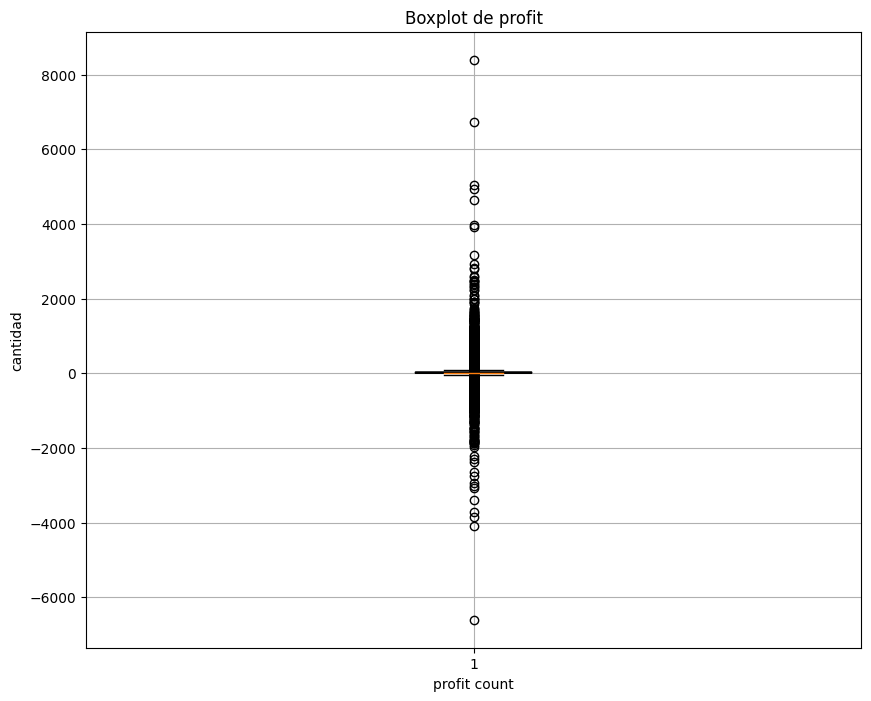

In [ ]:
plt.figure(figsize=(10, 8))
# Access the 'reviews count' column of the DataFrame correctly
plt.boxplot(df_ventas['profit'], patch_artist=True, notch=True)
plt.title('Boxplot de profit')
plt.xlabel('profit count')
plt.ylabel('cantidad')
plt.grid(True)
plt.show()

Boxplot quantity

In [ ]:
import plotly.express as px

# Crear un boxplot interactivo de la variable 'discount'
fig = px.box(df_ventas, y='quantity', title='Boxplot of quantity', color_discrete_sequence=['purple'])

# Actualizar el diseño para mostrar los valores de los outliers
fig.update_traces(marker=dict(color='purple'), boxmean='sd')  # Cambia color si es necesario

# Mostrar el gráfico
fig.show()

Boxplot de sales

In [ ]:
import plotly.express as px

# Crear un boxplot interactivo de la variable 'discount'
fig = px.box(df_ventas, y='sales', title='Boxplot of sales', color_discrete_sequence=['purple'])

# Actualizar el diseño para mostrar los valores de los outliers
fig.update_traces(marker=dict(color='purple'), boxmean='sd')  # Cambia color si es necesario

# Mostrar el gráfico
fig.show()

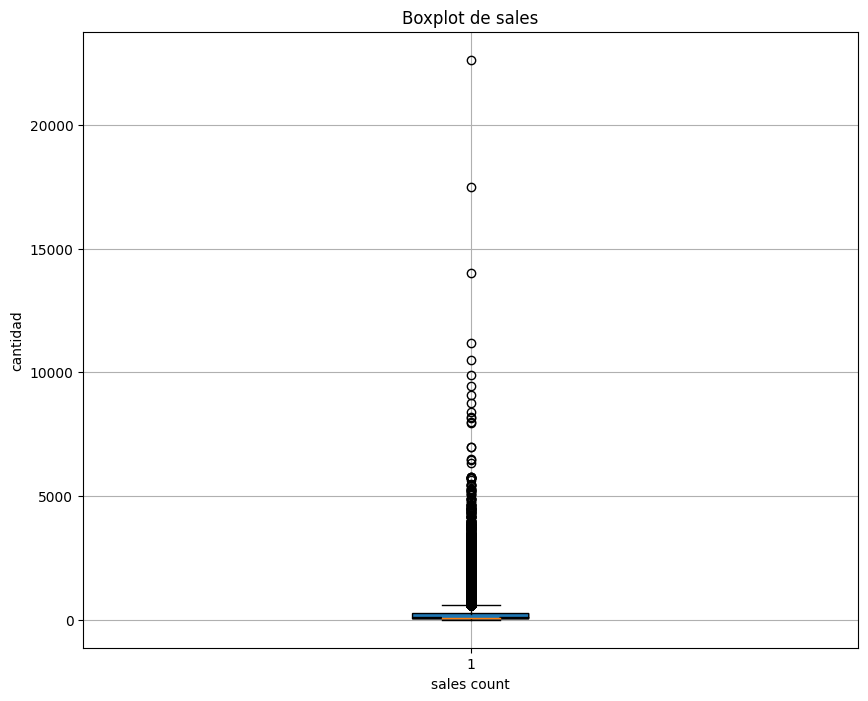

In [ ]:
plt.figure(figsize=(10, 8))
# Access the 'reviews count' column of the DataFrame correctly
plt.boxplot(df_ventas['sales'], patch_artist=True, notch=True)
plt.title('Boxplot de sales')
plt.xlabel('sales count')
plt.ylabel('cantidad')
plt.grid(True)
plt.show()

Boxplot de shipping_cost

In [ ]:
import plotly.express as px

# Crear un boxplot interactivo de la variable 'discount'
fig = px.box(df_ventas, y='shipping_cost', title='Boxplot of shipping cost', color_discrete_sequence=['purple'])

# Actualizar el diseño para mostrar los valores de los outliers
fig.update_traces(marker=dict(color='purple'), boxmean='sd')  # Cambia color si es necesario

# Mostrar el gráfico
fig.show()

In [ ]:

import requests
from bs4 import BeautifulSoup
import csv

# URL de la página de Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_supermarket_chains"

# Obtener el contenido de la página
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Encontrar todas las tablas en la página
tables = soup.find_all('table', {'class': 'wikitable'})

# Si hay múltiples tablas, seleccionar la que deseas (en este caso, la primera)
table = tables[0]

# Obtener todos los encabezados de columna
headers = [header.text.strip() for header in table.find_all('th')]

# Extraer todas las filas de la tabla
rows = table.find_all('tr')

# Crear una lista para almacenar los datos de la tabla
data = []

# Extraer cada celda de cada fila
for row in rows:
    cells = row.find_all(['td', 'th'])  # Considerar tanto las celdas de datos como las de encabezado
    cells = [cell.text.strip() for cell in cells]  # Quitar espacios en blanco
    if cells:  # Si hay celdas
        data.append(cells)

# Exportar a CSV tratando todo como cadenas
csv_filename = 'supermarket_chains.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f, quoting=csv.QUOTE_ALL, delimiter=';')
    writer.writerow(headers)  # Escribir los encabezados
    for row in data:
        writer.writerow([str(cell) for cell in row])  # Escribir cada fila asegurando que todo sea string

print(f'Datos exportados correctamente a {csv_filename}')


Datos exportados correctamente a supermarket_chains.csv
